In [3]:
import numpy as np
import random as rd

In [72]:
error_report=[]
class Neuron():
    def __init__(self):
        np.random.seed(0)
        #Initializing random weights for the neuron 
        self.weights= 2* np.random.random((3,1)) -1
    
    def sig(self, x):
        # sigmoid activation function
        return 1/ (1+ np.exp(-x))
    
    def sig_der(self, x):
        # sigmoid derivation
        return x*(1+x)
    
    def predict(self, x):
        return self.sig(np.dot(x,self.weights))
    
    def fit(self, x, y, epochs, lr= 0.1):
        # training the neuron and adjusting the weight
        for i in range(epochs):
            output= self.predict(x)
            error= output-y
            error_report.append(np.mean(error))
            adjust= np.dot(x.T, error*self.sig_der(output))
            self.weights= self.weights-(lr*adjust)


if __name__=='__main__':
    neuron= Neuron()
    print('The weight before training are:')
    print(neuron.weights)
    train_inputs = np.array([[0, 0, 1], [1, 1, 1], [1, 0, 1], [0, 1, 1]]) 
    train_outputs = np.array([[0, 1, 1, 0]]).T
    neuron.fit(train_inputs, train_outputs, 1000, lr= 0.05)
    print('The weight after training are:')
    print(neuron.weights)
    
    print('The predicted output of [1,0,0] is:')
    print(neuron.predict(np.array([1,0,0])))

The weight before training are:
[[0.09762701]
 [0.43037873]
 [0.20552675]]
The weight after training are:
[[ 6.62453261]
 [-0.20268395]
 [-1.73080302]]
The predicted output of [1,0,0] is:
[0.99867436]


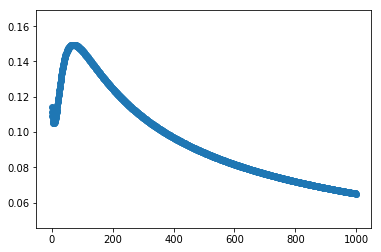

In [73]:
import matplotlib.pyplot as plt

epochs= range(1000)
plt.figure()
plt.scatter(epochs,error_report)
plt.show()